# **Vietnam Housing (Hanoi)**

## **1. Tiền xử lý dữ liệu:**

### **1.1. Đọc file dữ liệu:**

In [135]:
import pandas as pd
import numpy as np

In [136]:
df=pd.read_csv("Vn_housing.csv")
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


**Số dòng, số cột:**

In [137]:
number_rows, number_cols = df.shape
print("Số hàng: ", number_rows)
print("Số cột: ", number_cols)

Số hàng:  82497
Số cột:  13


**Ý nghĩa của mỗi dòng:** thông tin về giá nhà ở một khu vực ở Hà nội.

In [138]:
df.head(1)

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"


**Ý nghĩa mỗi cột:** 

In [139]:
list(df.columns)

['Unnamed: 0',
 'Ngày',
 'Địa chỉ',
 'Quận',
 'Huyện',
 'Loại hình nhà ở',
 'Giấy tờ pháp lý',
 'Số tầng',
 'Số phòng ngủ',
 'Diện tích',
 'Dài',
 'Rộng',
 'Giá/m2']

Xóa cột `Unnamed: 0` không cần thiết:

In [140]:
df=df.drop(columns='Unnamed: 0')

**Kiểu dữ liệu của cột sau khi xóa:**

In [141]:
df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Dài                object
Rộng               object
Giá/m2             object
dtype: object

Các cột `Ngày`, `Số tầng`, `Số phòng ngủ`, `Diện tích`, `Dài`, `Rộng`, `Giá/m2` có kiểu dữ liệu chưa đúng, ta sẽ tiến hành tiền xử lý để đưa về đúng kiểu dữ liệu theo từng bước sau:

### **1.2. Kiểm tra trùng lặp dữ liệu:**

Kiểm tra dữ liệu xem có tồn tại dòng dữ liệu nào bị trùng lặp hay không và thực hiện xóa:

In [142]:
sum(df.duplicated())

815

In [143]:
df=df.drop_duplicates()

### **1.3. Kiểm tra dữ liệu bị thiếu:**

Tỉ lệ giá trị bị thiếu ở mỗi cột:

In [144]:
df.isnull().sum() / len(df)

Ngày               0.000012
Địa chỉ            0.000588
Quận               0.000024
Huyện              0.000588
Loại hình nhà ở    0.000392
Giấy tờ pháp lý    0.347959
Số tầng            0.556585
Số phòng ngủ       0.000477
Diện tích          0.000024
Dài                0.758233
Rộng               0.567873
Giá/m2             0.000159
dtype: float64

Mỗi cột đều có giá trị thiếu, đầu tiên ta sẽ thực hiện xóa những dòng có nhiều hơn 50% giá trị bị thiếu so với các cột:

In [145]:
df.dropna(thresh=df.shape[1] - 5, inplace=True)

In [146]:
df.isnull().sum() / len(df)

Ngày               0.000000
Địa chỉ            0.000269
Quận               0.000012
Huyện              0.000233
Loại hình nhà ở    0.000331
Giấy tờ pháp lý    0.347720
Số tầng            0.556422
Số phòng ngủ       0.000453
Diện tích          0.000012
Dài                0.758144
Rộng               0.567714
Giá/m2             0.000147
dtype: float64

#### **Tiến hành điền giá trị thiếu:**

**Cột `Giá`:**

In [147]:
df[df["Giá/m2"].isnull()].shape[0]

12

Có 12 dòng bị thiếu, ta sẽ xóa những dòng này.

In [148]:
df.dropna(subset=['Giá/m2'], inplace=True)

Cột `Quận:`

In [149]:
df[df["Quận"].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
48418,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


In [150]:
df.loc[48418, 'Quận'] = 'Thanh Trì'
df.loc[48418, 'Huyện'] = 'Ngọc Hồi'

**Cột Huyện**:

In [151]:
df[df["Huyện"].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
324,2020-08-04,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²"
741,2020-08-04,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²"
8584,2020-07-31,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²"
29300,2020-07-18,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,24 m²,NaN,NaN,"129,17 triệu/m²"
35553,2020-07-14,"Đường Thịnh Hào 3, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,36 m²,NaN,NaN,100 triệu/m²
40906,2020-07-09,"Đường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà mặt phố, mặt tiền",NaN,NaN,4 phòng,40 m²,NaN,NaN,"82,5 triệu/m²"
46176,2020-07-06,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,80 triệu/m²
54426,2020-06-29,"Đường Trần Duy Hưng, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,NaN,NaN,140 triệu/m²
58641,2020-06-25,"Đường Bùi Xương Trạch, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,31 m²,NaN,NaN,"116,13 triệu/m²"
61781,2020-06-23,"Đường Tôn Thất Tùng, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,37 m²,NaN,NaN,"110,81 triệu/m²"


Có vẻ như các giá trị bị thiếu là do địa chỉ đó thật sự không có `Huyện`. Ta sẽ điền giá trị bị thiếu bằng giá trị tương ứng trong cột `Quận`

In [152]:
df['Huyện'].fillna(df['Quận'], inplace=True)

**Cột `Địa chỉ`:**

Điền giá trị bị thiếu cho cột `Địa chỉ` = `Huyện` + `Quận` + `Thành phố`:

In [153]:
def fill_missing_address(row):
    huyen = row['Huyện']
    quan = row['Quận']
    
    if pd.notnull(huyen) and pd.notnull(quan):
        return huyen + ', ' + quan + ', ' 
    elif pd.notnull(huyen):
        return huyen + ', ' 
    else:
        return quan + ', '


df['Địa chỉ'] = df.apply(fill_missing_address, axis=1)

**Cột: `Loại hình nhà ở`:**

In [154]:
df[df["Loại hình nhà ở"].isnull()].shape[0]

27

In [155]:
df["Loại hình nhà ở"].fillna("Không rõ", inplace=True)

**Cột: `Giấy tờ pháp lý`:**

In [156]:
df[df['Giấy tờ pháp lý'].isnull()].shape[0]

28388

In [157]:
df['Giấy tờ pháp lý'].fillna("Không rõ", inplace=True)

**Cột: `Số tầng`:**

In [158]:
df[df['Số tầng'].isnull()].shape[0]

45425

In [159]:
df['Số tầng'].fillna(1, inplace=True)

**Cột: `Số phòng ngủ`:**

In [160]:
df[df["Số phòng ngủ"].isnull()].shape[0]

37

In [161]:
df['Số phòng ngủ'].fillna('1', inplace=True)

**Cột: `Dài`, `Rộng`:**

Ta không có cơ sở để điền giá trị cho 2 cột này, tỉ lệ giá trị bị thiếu của 2 cột cũng lớn hơn 50%. Thực hiện xóa 2 cột này:

In [162]:
df=df.drop(columns=["Dài","Rộng"])

Tỉ lệ giá trị bị thiếu ở mỗi cột:

In [163]:
df.isnull().sum() / len(df)

Ngày               0.0
Địa chỉ            0.0
Quận               0.0
Huyện              0.0
Loại hình nhà ở    0.0
Giấy tờ pháp lý    0.0
Số tầng            0.0
Số phòng ngủ       0.0
Diện tích          0.0
Giá/m2             0.0
dtype: float64

### **1.4. Đưa các cột về đúng kiểu dữ liệu:**

In [164]:
df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Giá/m2             object
dtype: object

- Cột `Ngày` cần chuyển về kiểu datetime.
- Cột `Số tầng`, `Số phòng ngủ`, `Diện tích`, `Giá/m2` cần chuyển về dạng số.

Cột `Số tầng:`

In [165]:
df['Số tầng'].unique()

array(['4', 1, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [166]:
df.loc[df['Số tầng']=='Nhiều hơn 10','Số tầng']=11

In [167]:
df['Số tầng'] = df['Số tầng'].astype(int)

Cột `Số phòng ngủ:`

In [168]:
df["Số phòng ngủ"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       '1'], dtype=object)

In [169]:
df.loc[df["Số phòng ngủ"]=='nhiều hơn 10 phòng','Số phòng ngủ']='11'

In [170]:
df["Số phòng ngủ"]=df["Số phòng ngủ"].str.replace('phòng', '')
df["Số phòng ngủ"]=df["Số phòng ngủ"].astype(int)

Cột `Diện tích:`

In [171]:
df["Diện tích"].unique()

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²', '104 m²', '83 m²', '68 m²', '31 m²', '64 m²', '32.1 m²',
       '185 m²', '61 m²', '23 m²', '92 m²', '85 m²', '30.2 m²', '26 m²',
       '140 m²', '31.5 m²', '63 m²', '39 m²', '80 m²', '57 m²', '16 m²',
       '13 m²', '67 m²', '35.22 m²', '110 m²', '35.21 m²', '138 m²',
       '3 m²', '40.22 m²', '22 m²', '32.22 m²', '82 m²', '53 m²', '86 m²',
       '47.3 m²', '33.33 m²', '87 m²', '96 m²', '66 m²', '451 m²',
       '108 m²', '32.07 m²', '125 m²', '33.1 m²', '39.8 m²', '36.5 m²',
 

In [172]:
df["Diện tích"]=df["Diện tích"].str.replace('m²', '')
df["Diện tích"]=df["Diện tích"].astype(float)

In [173]:
import matplotlib.pyplot as plt

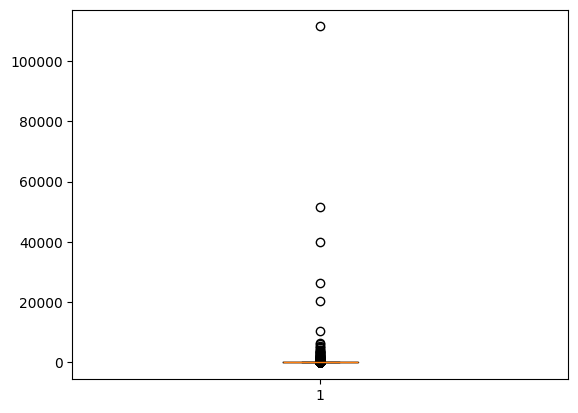

In [174]:
plt.boxplot(df["Diện tích"])
plt.show()

Có khá nhiều outlier, ta sẽ tìm và loại bỏ bớt.

In [175]:
df[df['Diện tích'] <= df['Diện tích'].quantile(0.0005)]
df.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,2020-08-05,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,"86,96 triệu/m²"
1,2020-08-05,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,"116,22 triệu/m²"
2,2020-08-05,"Phường Minh Khai, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,65 triệu/m²
3,2020-08-05,"Phường Thụy Khuê, Quận Tây Hồ,",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,1,6,51.0,100 triệu/m²
4,2020-08-05,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,1,4,36.0,"86,11 triệu/m²"


In [176]:
df[df['Diện tích'] >= df['Diện tích'].quantile(0.9998)]
df.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,2020-08-05,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,"86,96 triệu/m²"
1,2020-08-05,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,"116,22 triệu/m²"
2,2020-08-05,"Phường Minh Khai, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,65 triệu/m²
3,2020-08-05,"Phường Thụy Khuê, Quận Tây Hồ,",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,1,6,51.0,100 triệu/m²
4,2020-08-05,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,1,4,36.0,"86,11 triệu/m²"


Dựa vào mối quan hệ giữa `Diện tích` và `Giá`, ta thấy các dòng ở trên hoàn toàn sai và ta sẽ thực hiện xóa chúng.

In [177]:
min_=df['Diện tích'].quantile(0.0005)
max_=df['Diện tích'].quantile(0.9998)

df=df[df['Diện tích'] >= min_]
df=df[df['Diện tích'] <= max_]

Cột `Giá`:

In [178]:
import re

Thêm cột `Đơn vị` để ghi nhận các `Giá` có đơn vị khác nhau:

In [179]:
df['Đơn vị'] = df['Giá/m2'].apply(lambda x: re.findall(r'[^\d.,]+', x)[0])
df['Đơn vị'].unique()

array([' triệu/m²', ' đ/m²', ' tỷ/m²'], dtype=object)

In [180]:
df[df["Đơn vị"]==' đ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Đơn vị
93,2020-08-04,"Phường Cầu Diễn, Quận Nam Từ Liêm,",Quận Nam Từ Liêm,Phường Cầu Diễn,Nhà phố liền kề,Đã có sổ,5,4,113.0,247.787 đ/m²,đ/m²
283,2020-08-04,"Phường Kim Liên, Quận Đống Đa,",Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Không rõ,1,3,42.0,90.476 đ/m²,đ/m²
338,2020-08-04,"Phường Ngọc Thụy, Quận Long Biên,",Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,1,3,140.0,178.571 đ/m²,đ/m²
351,2020-08-04,"Phường Tân Mai, Quận Hoàng Mai,",Quận Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6,60.0,125.000 đ/m²,đ/m²
621,2020-08-04,"Phường Đồng Tâm, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Đồng Tâm,"Nhà ngõ, hẻm",Đã có sổ,3,2,53.0,75.471 đ/m²,đ/m²
...,...,...,...,...,...,...,...,...,...,...,...
82294,2020-05-10,"Phường Xuân La, Quận Tây Hồ,",Quận Tây Hồ,Phường Xuân La,"Nhà ngõ, hẻm",Đã có sổ,6,5,49.0,59.183 đ/m²,đ/m²
82316,2020-05-07,"Phường Láng Thượng, Quận Đống Đa,",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,1,4,45.0,85.555 đ/m²,đ/m²
82325,2020-05-04,"Phường Ô Chợ Dừa, Quận Đống Đa,",Quận Đống Đa,Phường Ô Chợ Dừa,"Nhà ngõ, hẻm",Đã có sổ,1,4,38.0,86.842 đ/m²,đ/m²
82344,2020-04-27,"Phường Hoàng Văn Thụ, Quận Hoàng Mai,",Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà ngõ, hẻm",Không rõ,1,3,46.0,69.565 đ/m²,đ/m²


In [181]:
df[df["Đơn vị"]==' tỷ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Đơn vị
1100,2020-08-04,"Phường Khương Trung, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Không rõ,1,3,36.0,"1,202777777 tỷ/m²",tỷ/m²
1144,2020-08-04,"Phường Láng Hạ, Quận Đống Đa,",Quận Đống Đa,Phường Láng Hạ,"Nhà ngõ, hẻm",Đã có sổ,5,3,35.0,"1,142857142 tỷ/m²",tỷ/m²
1657,2020-08-04,"Phường La Khê, Quận Hà Đông,",Quận Hà Đông,Phường La Khê,Nhà phố liền kề,Không rõ,1,6,5.0,"1,96 tỷ/m²",tỷ/m²
2849,2020-08-03,"Phường Thanh Xuân Trung, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Không rõ,1,2,35.0,"1,557142857 tỷ/m²",tỷ/m²
3795,2020-08-03,"Phường Hàng Bồ, Quận Hoàn Kiếm,",Quận Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",Đã có sổ,8,11,126.0,"1,111111111 tỷ/m²",tỷ/m²
...,...,...,...,...,...,...,...,...,...,...,...
78107,2020-06-09,"Xã Vân Canh, Huyện Hoài Đức,",Huyện Hoài Đức,Xã Vân Canh,"Nhà ngõ, hẻm",Đã có sổ,4,3,30.0,"5,833333333 tỷ/m²",tỷ/m²
79034,2020-06-09,"Phường Láng Thượng, Quận Đống Đa,",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,"1,0125 tỷ/m²",tỷ/m²
79835,2020-06-08,"Phường Nam Đồng, Quận Đống Đa,",Quận Đống Đa,Phường Nam Đồng,"Nhà ngõ, hẻm",Đã có sổ,1,3,45.0,"1,706666666 tỷ/m²",tỷ/m²
80222,2020-06-08,"Phường Lý Thái Tổ, Quận Hoàn Kiếm,",Quận Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Không rõ,1,4,100.0,"1,5 tỷ/m²",tỷ/m²


Chuyển đổi đơn vị về 'triệu/m²'

In [182]:
df['Giá/m2']=df['Giá/m2'].str.replace('.', '')
df['Giá/m2']=df['Giá/m2'].str.replace(',', '.')

In [183]:
df['Giá/m2'] = df['Giá/m2'].str.replace('đ/m²', '').str.replace('triệu/m²', '').str.replace('tỷ/m²', '')

In [184]:
df["Giá/m2"]=df["Giá/m2"].astype(float)

In [185]:
def convert_price(row):
    if row['Đơn vị'] == ' tỷ/m²':
        return row['Giá/m2'] * 1000
    elif row['Đơn vị'] == ' đ/m²':
        return row['Giá/m2'] * 0.000001
    else:
        return row['Giá/m2']

df['Giá/m2'] = df.apply(convert_price, axis=1)

df=df.drop(columns="Đơn vị")
df = df.rename(columns={'Giá/m2': 'Giá (triệu đồng/m2)'})

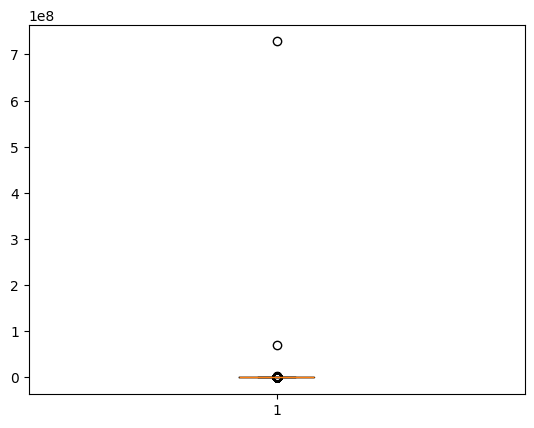

In [186]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

Có khá nhiều outlier, ta sẽ tìm và loại bỏ bớt.

In [187]:
df['Lower Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
df['Upper Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))


df = df[(df['Giá (triệu đồng/m2)'] >= df['Lower Bound']) & (df['Giá (triệu đồng/m2)'] <= df['Upper Bound'])]
df = df.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [188]:
sum(df.duplicated())

949

In [189]:
df=df.drop_duplicates()

### *Tạo file dữ liệu sau khi qua xử lý:*

In [190]:
new_file = r'C:/Users/Hoan/anaconda3/envs/test/Ha_Noi_St/file_new/du_lieu_lam_sach.csv'
# Lưu kết quả sau khi xử lý vào file CSV mới
df.to_csv(new_file, index=False)

### **2. Split dataset(X, Y):**

In [191]:
df_1 = pd.read_csv('file_new/du_lieu_lam_sach.csv')
df_1.head(2)

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá (triệu đồng/m2)
0,2020-08-05,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,86.96
1,2020-08-05,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,116.22


## feature_selection (chọn các trường dữ liệu để dự đoán) ##

In [192]:
features = ["Số tầng", "Số phòng ngủ", "Diện tích"]

In [193]:
X = df_1[features]
y = df_1["Giá (triệu đồng/m2)"]

In [194]:
X.head()

,Số tầng,Số phòng ngủ,Diện tích
0,4,5,46.0
1,1,3,37.0
2,4,4,40.0
3,1,6,51.0
4,1,4,36.0


In [195]:
y.head()

0     86.96
1    116.22
2     65.00
3    100.00
4     86.11
Name: Giá (triệu đồng/m2), dtype: float64

###  X, y --> X train, y_train, X_valid, y_valid

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(X, y, train_size=0.8, test_size= 0.2, random_state= 0) 

In [197]:
X_train.shape #80% data

(59281, 3)

In [198]:
X.shape

(74102, 3)

In [199]:
X_valid.shape #20% data

(14821, 3)

In [200]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [201]:
#fit data to model 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [202]:
y_preds = dt_model.predict(X_valid.head())

In [203]:
y_preds

array([ 93.81333333,  76.92642857, 113.05882353,  85.22356322,
        96.83561404])

In [204]:
pd.DataFrame({'y': y_valid.head(), 'y_preds': y_preds}) #so sánh thử giá trị của y ban đầu và y_preds

,y,y_preds
1659,88.10,93.813333
20448,62.75,76.926429
53166,150.00,113.058824
1390,103.57,85.223563
52676,145.31,96.835614


In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [207]:
rf_val_preds = rf_model.predict(X_valid)
rf_val_preds[:5]

array([ 93.76149302,  76.0985258 , 112.6960856 ,  85.45006057,
        97.17177344])

### Predict with a new input

In [208]:
X_valid.head()

,Số tầng,Số phòng ngủ,Diện tích
1659,1,4,42.0
20448,1,2,51.0
53166,6,4,50.0
1390,5,3,42.0
52676,1,5,32.0


In [217]:
rf_model.predict([[4, 5, 46.0]])

C:\Users\Hoan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([106.46043044])

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("file_new/du_lieu_lam_sach.csv")
X = data[['Số tầng', 'Số phòng ngủ', 'Diện tích']]
y = data['Giá (triệu đồng/m2)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)


model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)


y_preds = model.predict(X_valid)
r2 = r2_score(y_valid, y_preds)

print(f"R-squared: {r2:.2f}")


R-squared: 0.01


### Nhận thấy mô hình DecisionTreeRegressor có độ chính xác không cao, tiến hành sử dụng LinearRegression trong thư viện streamlit